## Webminicursos SBF
# Python para Físicos - Setembro/2023
Andre Nepomuceno - UFF

**Aula 3: SciPy**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as pc
from scipy.special import gamma, j1, factorial, eval_hermite
from scipy.optimize import newton
from scipy.optimize import curve_fit
from scipy.integrate import quad, solve_ivp
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import write
%matplotlib inline

**1. Constantes Físicas**

In [10]:
pc.physical_constants['elementary charge']

(1.602176634e-19, 'C', 0.0)

In [ ]:
x = [0.5,1,2.5,4]
gamma(x)

**2. Funções Especiai** \
**Exemplo: Padrão de difração circular**

In [12]:
x = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,x)
r = np.sqrt(X**2 + Y**2)
r.shape

(1000, 1000)

In [13]:
ll = 0.5  #micrometros
k = 2*np.pi/ll
I = (j1(k*r)/(k*r))**2

[]

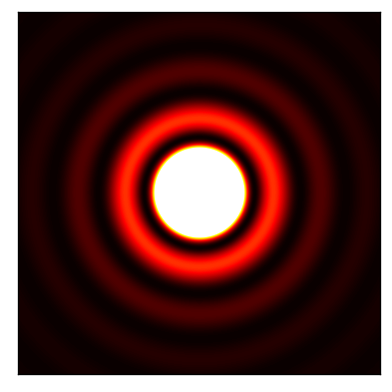

In [16]:
fig,ax = plt.subplots(dpi=120)
ax.imshow(I,cmap='hot',vmax=0.01)
ax.set_xticks([])
ax.set_yticks([])

**3. Eq. não lineares** \
**Exemplo: Ferromagnetismo**

In [17]:
def f(m):
    return m - np.tanh(C*m/T)

In [18]:
C = 1
T = 0.5
m0 = 0.5
newton(f,m0)

0.9575040240772688

In [21]:
C = 1
T = np.linspace(0.001,2,100)
m0 = 0.5*np.ones(T.size)
msol = newton(f,m0)
msol[:10]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999, 0.99999985, 0.99999842, 0.99999094, 0.9999647 ])

Text(0, 0.5, 'm')

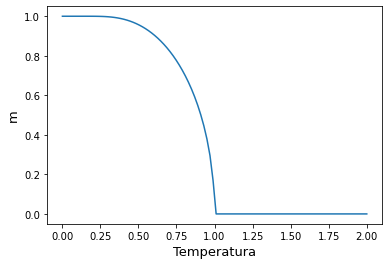

In [22]:
plt.plot(T,msol)
plt.xlabel('Temperatura',fontsize=13)
plt.ylabel('m',fontsize=13)

**4. Ajuste de Curvas**\
**Exemplo: Ajuste linear**

In [23]:
data = np.loadtxt('dados_pendulo.txt')

In [24]:
data[:4]

array([[1.48e+01, 8.00e-01, 1.00e-02],
       [1.18e+01, 7.20e-01, 1.00e-02],
       [8.80e+00, 6.10e-01, 1.00e-02],
       [5.80e+00, 5.10e-01, 1.00e-02]])

In [25]:
comp = data[:,0]
T = data[:,1]
sigmaT = data[:,2]

In [26]:
T2 = T**2
sigmaT2 = 2*T*sigmaT

<ErrorbarContainer object of 3 artists>

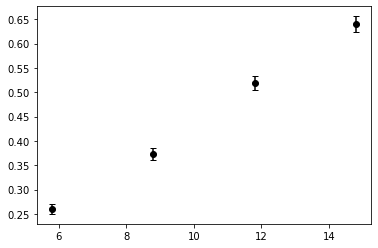

In [27]:
plt.errorbar(comp,T2,sigmaT2,capsize=3,fmt='ok')

In [28]:
def periodo2(L,a,b):
    return a*L + b

In [29]:
popt,pcov = curve_fit(periodo2,comp,T2,sigma=sigmaT2,absolute_sigma=True)
popt

array([0.04258387, 0.00890565])

In [30]:
err_y = np.sqrt(np.diag(pcov))
err_y

array([0.00193438, 0.01881484])

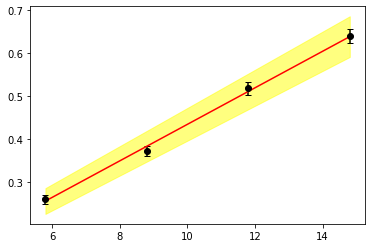

In [31]:
x = np.linspace(comp.min(),comp.max(),100)
y1 = periodo2(x,(popt[0]+err_y[0]),(popt[1] + err_y[1]))
y2 = periodo2(x,(popt[0]-err_y[0]),(popt[1] - err_y[1]))
plt.errorbar(comp,T2,sigmaT2,capsize=3,fmt='ok')
plt.plot(x,periodo2(x,popt[0],popt[1]),'r')
plt.fill_between(x,y2,y1,color='yellow',alpha=0.5)

In [32]:
g = 4*np.pi**2/popt[0]*1e-2
print(f'g = {g:.2f} m/s2')

g = 9.27 m/s2


**5. Integração Numérica**

Singularidade

In [33]:
f5 = lambda x: 1/np.sqrt(np.abs(x))

(0.0, 18.0)

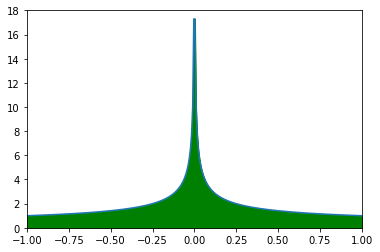

In [34]:
fig,ax= plt.subplots()
x = np.linspace(-1,1,300)
ax.plot(x,f5(x))
ax.fill_between(x,f5(x),color='g')
ax.set_xlim(-1,1)
ax.set_ylim(0,18)

In [38]:
quad(f5,-1,1,points=[0])

(3.9999999999999813, 5.684341886080802e-14)

**Exemplo: oscilador harmônico quântico**

\begin{equation}
\psi_n = \frac{1}{\sqrt{2^nn!\sqrt{\pi}}}e^{-x^2/2}H_n(x),
\nonumber
\end{equation}

In [40]:
def psi(x,n):
    return 1/( np.sqrt(2**n*factorial(n)*np.sqrt(np.pi) ))*np.exp(-x**2/2)*eval_hermite(n,x)

(-4.0, 4.0)

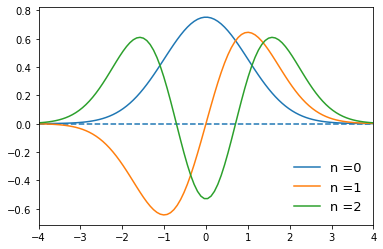

In [41]:
#gráfico
x = np.linspace(-4,4,100)
for n in range(3):
    plt.plot(x,psi(x,n),label='n ='+str(n))
plt.legend(fontsize=13,frameon=False)
plt.hlines(0,-4,4,ls='--')
plt.xlim(-4,4)

In [42]:
f = lambda x,n: x**2*psi(x,n)**2

In [46]:
I = quad(f,0,np.inf,args=(5,))
I

(2.7500000000000036, 2.460383956923928e-08)

**6. Equações Diferenciais**

**6.1 - ED0 de primeira ordem**

In [47]:
def dydt(t,y):
    return -k*y

In [48]:
k = 0.2
y0 = 100
#intervalo de tempo
t0, tf = 0,20

In [49]:
solve_ivp (dydt , (t0 , tf), y0 = [y0])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.13797324,  1.51770566,  6.11233264, 10.4942851 ,
       14.88942184, 19.28378064, 20.        ])
 t_events: None
        y: array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         12.27361105,   5.09829981,   2.11809624,   1.83542088]])
 y_events: None

In [52]:
sol1 = solve_ivp (dydt ,(t0, tf), [y0])
sol1.y

array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         12.27361105,   5.09829981,   2.11809624,   1.83542088]])

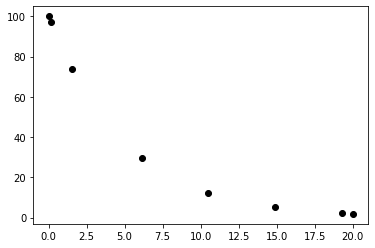

In [53]:
plt.plot(sol1.t,sol1.y[0],'ok')

Para obter a solução com uma maior resolução temporal, podemos passar um array para o argumenot **t_eval**

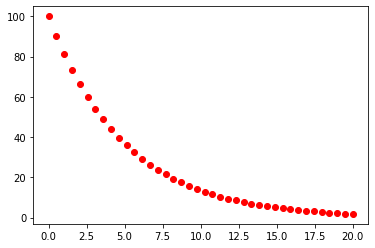

In [54]:
tpoints = np.linspace(t0,tf,40)
sol2 = solve_ivp (dydt, (t0, tf), [y0],t_eval=tpoints)
plt.plot(sol2.t, sol2.y[0],'ro')

**6.2 - ED0s Acopladas**
\begin{eqnarray*}
\frac{dS}{dt}& = &-\beta SI, \\
\frac{dI}{dt}& = &\beta SI - \gamma I, \\
\frac{dR}{dt}& = & \gamma I, \\
\end{eqnarray*}

In [56]:
#Definir N e valores iniciais
N = 100000
I0 = 2
S0 = N-2
R0 = 0
t0,tf = 0,120 #120 dias

In [57]:
#definir as funcoes
def dydt(t,Y,beta,gamma):
    S,I,R = Y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [58]:
beta,gamma = 5.0e-6,0.2
sol3 = solve_ivp(dydt,(t0, tf), y0=[S0,I0,R0],args=(beta,gamma),dense_output=True)
print(sol3.success)

True


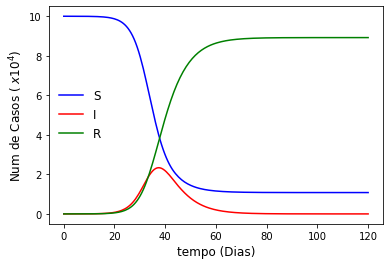

In [59]:
#vamos plotar as soluções
t = np.linspace(t0,tf,200)
st = sol3.sol(t)[0]/1e4
it = sol3.sol(t)[1]/1e4
rt = sol3.sol(t)[2]/1e4
plt.plot(t,st,'b',label='S')
plt.plot(t,it,'r',label='I')
plt.plot(t,rt,'g',label='R')
plt.xlabel('tempo (Dias)',fontsize=12)
plt.ylabel('Num de Casos ( $x 10^4$)',fontsize=12)
plt.legend(frameon=False,loc='center left',fontsize=12)

**6.3 EDOs de Segunda Ordem**
\begin{equation}
    \frac{d^2x}{dt^2} \,=\, - \omega^2 x \nonumber
\end{equation}

In [63]:
omega = 0.9
A = 3
v0 = 0
t0,tf = 0,20
t = np.linspace(t0,tf,100)

In [64]:
def dxdt(t,Y):
    x,v = Y
    dxdt = v
    dvdt = -omega**2*x
    return dxdt,dvdt

In [65]:
sol4 = solve_ivp(dxdt,(t0,tf),y0=[A,v0],t_eval=t)
print(sol4.success)

True


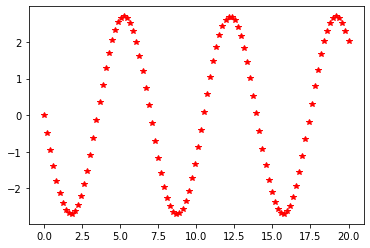

In [67]:
#plot solução
plt.plot(sol4.t,sol4.y[1],'r*',label='Numerico')

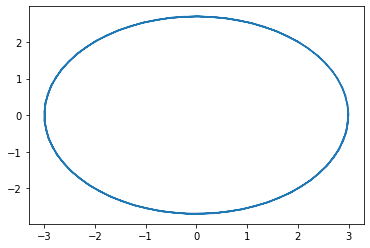

In [68]:
plt.plot(sol4.y[0],sol4.y[1])

**Exemplo: Pêndulo Não-Linear**

\begin{equation}
\frac{d\theta}{dt} = \psi \\
\frac{d\psi}{dt} = - \omega^2\textrm{sen}\theta
\end{equation}

In [69]:
def pendulo(t,Y,omega):
    theta,psi = Y
    dthdt = psi
    dpsidt = -omega**2*np.sin(theta)
    return dthdt, dpsidt

In [70]:
#Pendulo linear (para comparação)
def pend_linear(t,theta0):
    return theta0*np.cos(omega*t)

In [72]:
#constantets
omega = 0.7
t0,tf = 0,20
t = np.linspace(t0,tf,200)

In [76]:
#theta0 = 10 graus
y0_1 = [np.radians(10.),0.]
sol_pend1 = solve_ivp(pendulo, (t0, tf), y0 = y0_1,args=(omega,),t_eval=t)

In [77]:
#theta0 = 60 graus
y0_2 = [np.radians(60.),0.]
sol_pend2 = solve_ivp(pendulo, (t0, tf), y0 = y0_2,args=(omega,),t_eval=t)

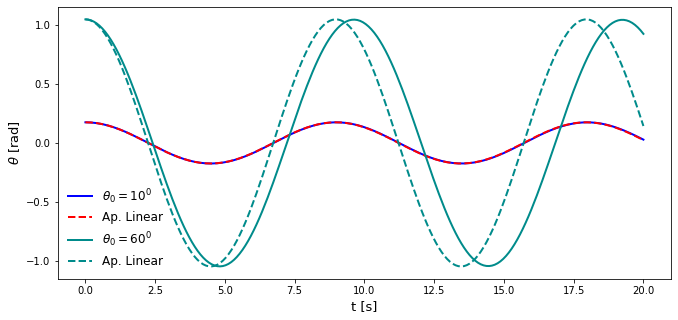

In [78]:
plt.figure(figsize=(11,5))
plt.plot(sol_pend1.t,sol_pend1.y[0],'b',lw=2,label=r'$\theta_0 = 10^{0}$')
plt.plot(t,pend_linear(t,y0_1[0]),'r--',lw=2,label='Ap. Linear')
plt.plot(sol_pend2.t,sol_pend2.y[0],c='darkcyan',lw=2,label=r'$\theta_0 = 60^{0}$')
plt.plot(t,pend_linear(t,y0_2[0]),c='darkcyan',ls='--',lw=2,label='Ap. Linear')
plt.xlabel('t [s]',fontsize=13)
plt.ylabel(r'$\theta$ [rad]',fontsize=13)
plt.legend(loc=3,fontsize=12,frameon=False)

**Conservação da Energia** \
$E = \frac{1}{2}m\,L^2\psi^2 + mg\,l(1 - cos\theta)$

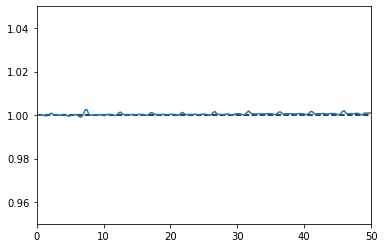

In [80]:
m = 1
g = 9.81
L = g/omega**2
t0,tf = (0,50)
sol_pend3 = solve_ivp(pendulo, (t0, tf), y0 = y0_2,args=(omega,),t_eval=np.linspace(0,tf,200),method='DOP853')
Etotal = m*g*L*(1-np.cos(y0_2[0]))
E = 0.5*m*L**2*sol_pend3.y[1]**2 +  m*g*L*(1-np.cos(sol_pend3.y[0]))
plt.plot(sol_pend3.t,E/Etotal)
plt.ylim(0.95,1.05)
plt.xlim(0,tf)
plt.hlines(1,0,tf,ls='--',color='k')

**7. Transformada Rápda de Fourrier**

**Exemplo**: O arquivo piano.txt contém os dados de uma única nota musical
tocada num piano. A forma de onda foi gravada na taxa padrão de 44100 Hz. Vamos utilizar FFT
para obter um espectro de frequência dos dados. 

In [81]:
data_som = np.loadtxt('piano.txt')
data_som.shape

(100000,)

100000
50001


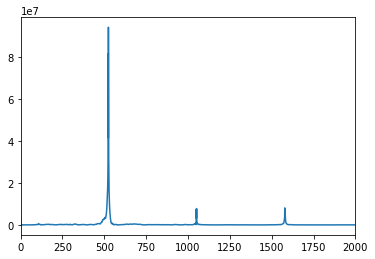

In [82]:
#FFT com scipy.fft.rfft
N = data_som.size
taxa = 44100 #Hz
ak = rfft(data_som)
xf = np.fft.rfftfreq(N, 1/taxa)
plt.plot(xf,np.absolute(ak))
plt.xlim(0,2000)
print(N)
print(ak.size)

In [83]:
#Valor da frequencia de pico
idmax = np.argmax(np.absolute(ak))
xf[idmax]

524.79

In [ ]:
#arquivo de som
som = np.int16(data_som)
write('nota_musical.wav',taxa,som)